# Experiment One
This is the first experiment using a single convolutional layer and no augmentation.

In [1]:
# model training using tensorflow
import numpy as np
import os
import cv2
from matplotlib import pyplot

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
'''
Configuration Code
'''
def get_n_cores():
    """The NSLOTS variable, If NSLOTS is not defined throw an exception."""
    nslots = os.getenv("NSLOTS")
    if nslots is not None:
        return int(nslots)
    raise ValueError("Environment variable NSLOTS is not defined.")


os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

NUM_GPUS = len(tf.config.experimental.list_physical_devices("GPU"))
print("Num GPUs Available: ", NUM_GPUS)
if NUM_GPUS > 0:
    print(os.getenv("CUDA_VISIBLE_DEVICES"))

tf.config.set_soft_device_placement(True)
tf.keras.backend.set_floatx("float32")
tf.config.threading.set_intra_op_parallelism_threads(1)
tf.config.threading.set_inter_op_parallelism_threads(get_n_cores())

Num GPUs Available:  1
0


In [4]:
batch_size = 32

DATA_DIRECTORY = os.path.join(os.getcwd(), 'train_data')

size = (224,224) # height, width

'''
Load the training data
'''
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  DATA_DIRECTORY,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=size,
  batch_size=batch_size
)

Found 2700 files belonging to 2 classes.
Using 2160 files for training.


In [5]:
'''
Load the validation data
'''
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  DATA_DIRECTORY,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=size,
  batch_size=batch_size
)

Found 2700 files belonging to 2 classes.
Using 540 files for validation.


In [6]:
# there are two classes
num_classes = 2

# normalize the input images
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224,224,3))

model = Sequential([
  normalization_layer,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes)
])

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                6422560   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 6,423,074
Trainable params: 6,423,074
Non-trainable params: 0
______________________________________________

In [11]:
epochs=100

# stop when the validation loss does not improve
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[callback]
)

Epoch 1/100
68/68 [==============================] - 50s 730ms/step - loss: 2.6010 - accuracy: 0.6231 - val_loss: 0.4698 - val_accuracy: 0.7833
Epoch 2/100
68/68 [==============================] - 7s 101ms/step - loss: 0.3803 - accuracy: 0.8380 - val_loss: 0.3168 - val_accuracy: 0.8593
Epoch 3/100
68/68 [==============================] - 7s 96ms/step - loss: 0.2108 - accuracy: 0.9264 - val_loss: 0.2503 - val_accuracy: 0.9000
Epoch 4/100
68/68 [==============================] - 6s 91ms/step - loss: 0.1134 - accuracy: 0.9731 - val_loss: 0.2372 - val_accuracy: 0.9093
Epoch 5/100
68/68 [==============================] - 5s 76ms/step - loss: 0.0700 - accuracy: 0.9838 - val_loss: 0.2332 - val_accuracy: 0.9222
Epoch 6/100
68/68 [==============================] - 6s 86ms/step - loss: 0.0368 - accuracy: 0.9949 - val_loss: 0.2863 - val_accuracy: 0.9037
Epoch 7/100
68/68 [==============================] - 5s 79ms/step - loss: 0.0233 - accuracy: 0.9972 - val_loss: 0.2638 - val_accuracy: 0.9222
Epo

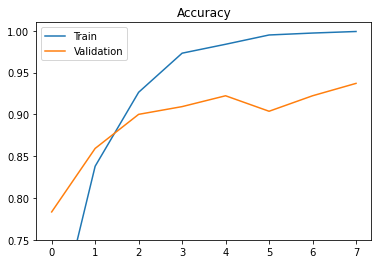

In [17]:
'''
Plot the accuracy
'''
pyplot.title("Accuracy")
pyplot.plot(range(len(history.history['accuracy'])), history.history['accuracy'], label = "Train")
pyplot.plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'], label = "Validation")
pyplot.ylim((0.75,1.01))
pyplot.legend()
pyplot.show()

In [14]:
try:
    os.mkdir('models')
except FileExistsError:
    pass

model.save('models/experiment_001')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models/experiment_001/assets
